In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Model subclassing and custom training loops

 ## Coding tutorials
 #### [1. Model subclassing](#coding_tutorial_1)
 #### [2. Custom layers](#coding_tutorial_2)
 #### [3. Automatic differentiation](#coding_tutorial_3)
 #### [4. Custom training loops](#coding_tutorial_4)
 #### [5. tf.function decorator](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Model subclassing

Es un metodo para definir modelos que da un nivel bajo de control en cuanto a la construccion y la operacion,
se trata de sobreescribir la clase Model dada por keras para que nuestros modelos hereden sus metodos

In [ ]:
#nota 
#*args sirve para que la funcion espere un numero variable de argumentos y no definido asi
def f(x,y): #solo sirve para 2 variables
    return x,y

def f(*args): #funciona para un numero arbitrario de parametros
    for elemento in args:
        #has algo con los parametros
        
# * es el que indica este comportamiento ie podemos ocupar cualquier nombre como *parametros *param        

In [ ]:
#**kwargs tiene la misma funcion pero recibe los distintos parametros como un diccionario
#** es lo que indica este comportamiento ie podemos ocupar cualquier nombre como **parametros **param

def f(**kwargs):
    for key, value in kwargs.items():
        #has algo con los parametros

In [ ]:
#estructura basica de model subclassing

#importamos clase modelo y capas que ocuparemos para el modelo
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense.Dropout

#definimos una clase y le pasamos la clase Model para indicar que hereda su estrucura (subclasing)
class MiModelo(Model):
    
    #Sobreescribimos el metodo init aqui creamos nuestras capas
    def __init__(self,numero_clases,**kwargs):
        super(MiModelo,self).__init__(**kwargs)
        #aqui definimos las capas que tiene nuestro modelo
        self.dense1=Dense(16, activation='sigmoid')
        self.dropout=Droput(0.5)
        self.dense2=Dense(numero_clases,activation='softmax')
        
    #sobreescribimos el metodo call que define el paso hacia adelante     
    def call(self,inputs,Opcion=False):
        #aplicamos las capas a las entradas ie aplica el modelo
        h=self.dense1(inputs)
        #con el booleano en training controlamos que droput se ejecute en entrenamiento pero no en test
        #es decir sirve para reglar el comportamiento
        h=self.dropout(h,training=Opcion)
        return self.dense2(h)
    
#instanciando la clase
mi_modelo=MiModelo(10,name='mi_modelo')

#ahora podemos usar los metodos .fit() .train() como siempre

In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Softmax, concatenate

#### Create a simple model using the model subclassing API

In [8]:
# Build the model
class MyModel(Model):
    
    
    def __init__(self):
        super(MyModel,self).__init__()
        self.dense1=Dense(64, activation='relu')
        self.dense2=Dense(10)
        self.dropout=Dropout(0.4)
        
         
    def call(self,inputs,training=True):
        h=self.dense1(inputs)
        if training:
            h=self.dropout(h)
        return self.dense2(h)

#podemos generar modelos mas dinamicos
class MyModel2(Model):
    
    
    def __init__(self):
        super(MyModel2,self).__init__()
        self.dense1=Dense(64, activation='relu')
        self.dense2=Dense(10)
        self.dense3=Dense(5)
        self.softmax=Softmax()
        
         
    def call(self,inputs):
        #entrada se pasan a dos capas distintas
        x=self.dense1(inputs)
        y1=self.dense2(inputs)
        y2=self.dense3(y1)
        concat=concatenate([x,y2])#note que esta no esta en el modelo la importamos y la usamos
        return self.softmax(concat)    


In [7]:
# Print the model summary
model=MyModel()
model(tf.random.uniform([1,10]))#pasamos entrada random para que genere pesos pues no lo compilamos
model.summary()

Model: "my_model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              multiple                  704       
_________________________________________________________________
dense_5 (Dense)              multiple                  650       
_________________________________________________________________
dropout (Dropout)            multiple                  0         
Total params: 1,354
Trainable params: 1,354
Non-trainable params: 0
_________________________________________________________________


In [9]:
model=MyModel2()
model(tf.random.uniform([1,10]))#pasamos entrada random para que genere pesos pues no lo compilamos
model.summary()

Model: "my_model2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              multiple                  704       
_________________________________________________________________
dense_7 (Dense)              multiple                  110       
_________________________________________________________________
dense_8 (Dense)              multiple                  55        
_________________________________________________________________
softmax (Softmax)            multiple                  0         
Total params: 869
Trainable params: 869
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Custom layers

Hasta ahora hemos usado las capas que tf.keras.layers ofrecen para nosotros pero tambien podemos definir nuestras propias capas con el comportamiento que deseemos, la forma en que podemos hacerlo es sobreescribiendo nuestra propia clase modelo

In [ ]:
#importamos tensorflow y la clase Layer
import tensorflow as tf
from tensorflow.keras.layers import Layer

#dotamos la clase con la herencia de Layer
class MiCapa(Layer):
    
    #Creamos las variables de la capa en el inicializador
    def __init__(self,input_dim,units):
        super(MiCapa,self).__init__()
        pesos_init=tf.random_normal_initializer() #definimos como inicializamos los pesos
        # definimos los pesos como un tensor variable con el inicializador que definimos y la forma deseada
        self.w=tf.Variable(initial_value=pesos_init(shape=(input_dim,units)))
        
     #Ojo no se necsitan dos init esta es una forma alterna de definir las variables
    def __init__(self,input_dim,units):
        super(MiCapa,self).__init__()
        #es una forma reducida con los pesos inicializados solo pasamos forma e inicializador
        #al metodo add_weight ambas formas son equivalentes
        self.w=self.add_weight(shape=(input_dim,units),initializer='random_normal')    
    
    #definimos los calculos que hace la capa
    def call(self,inputs):
        return tf.matmul(inputs,self.w)
    
#instanciando capa
mi_capa=MiCapa(3,2)
#ejecutando capa en un tensor
inputs=tf.ones((1,3))
mi_capa(inputs)

#podemos acceder a los metodos de capa como .weights 
#tambien ya podemos usa estas capas en nuestros modelos

In [10]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Softmax

#### Create custom layers

In [19]:
# Create a custom layer
class MyLayer(Layer):
         
    def __init__(self,units,input_dim):
        super(MyLayer,self).__init__()
        self.w=self.add_weight(shape=(input_dim,units),initializer='random_normal') #inicializa pesos   
        self.b=self.add_weight(shape=(units,),initializer='zeros') #inicializa sesgos
    
    def call(self,inputs):
        return tf.matmul(inputs,self.w)+self.b
    
my_layer=MyLayer(3,5)
x=tf.ones((1,5))
print(x)
print()
print(my_layer(x))
print()
print(my_layer.weights)

tf.Tensor([[1. 1. 1. 1. 1.]], shape=(1, 5), dtype=float32)

tf.Tensor([[-0.05633927 -0.22896083  0.10024416]], shape=(1, 3), dtype=float32)

[<tf.Variable 'Variable:0' shape=(5, 3) dtype=float32, numpy=
array([[-0.00614806, -0.06634471,  0.04945759],
       [ 0.06338884, -0.02636651,  0.02478405],
       [ 0.03693418, -0.03068536, -0.01494657],
       [-0.0628328 , -0.11265617, -0.01375101],
       [-0.08768144,  0.00709192,  0.05470009]], dtype=float32)>, <tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]


In [20]:
#como no hemos specificados que pesos son entrenables tenemos que tanto pesos como sesgos son entrenables
print('trainable weights:', len(my_layer.trainable_weights))
print('non-trainable weights:', len(my_layer.non_trainable_weights))

trainable weights: 2
non-trainable weights: 0


In [21]:
# Specify trainable weights
class MyLayer(Layer):
         
    def __init__(self,units,input_dim):
        super(MyLayer,self).__init__()
         #inicializa pesos y no se entrena
        self.w=self.add_weight(shape=(input_dim,units),initializer='random_normal',trainable=False)
        #inicializa sesgos y no se entrena
        self.b=self.add_weight(shape=(units,),initializer='zeros',trainable=False) 
    
    def call(self,inputs):
        return tf.matmul(inputs,self.w)+self.b
    
my_layer=MyLayer(3,5)


In [22]:
#hacemos que ninguno sea entrenable ni sesgos ni pesos se entrenaran
print('trainable weights:', len(my_layer.trainable_weights))
print('non-trainable weights:', len(my_layer.non_trainable_weights))

trainable weights: 0
non-trainable weights: 2


In [37]:
# Create a custom layer to accumulate means of output values

class MyLayerMean(Layer):
         
    def __init__(self,units,input_dim):
        super(MyLayerMean,self).__init__()
        #inicializa pesos 
        self.w=self.add_weight(shape=(input_dim,units),initializer='random_normal')
        #inicializa sesgos
        self.b=self.add_weight(shape=(units,),initializer='zeros')
        #inicializa suna variable en 0 y no se entrena
        self.sum_activation=tf.Variable(initial_value=tf.zeros((units,)),trainable=False)
        #inicializa suna variable en 0 y no se entrena
        self.number_call=tf.Variable(initial_value=0,trainable=False)
    
    def call(self,inputs):
        activations=tf.matmul(inputs,self.w)+self.b
        self.sum_activation.assign_add(tf.reduce_sum(activations,axis=0))#suma resultados
        self.number_call.assign_add(inputs.shape[0])#suma numero de entradas
        return activations, self.sum_activation/tf.cast(self.number_call,tf.float32)
    
my_layer=MyLayerMean(3,5)

In [38]:
# Test the layer

y , activation_means = my_layer(tf.ones((1, 5)))
print(activation_means.numpy())

y , activation_means = my_layer(tf.ones((1, 5)))
print(activation_means.numpy())

[-0.09079675 -0.15304194 -0.11420681]
[-0.09079675 -0.15304194 -0.11420681]


In [39]:
# Create a Dropout layer as a custom layer

class MyDropout(Layer):

    def __init__(self, rate):
        super(MyDropout, self).__init__()
        self.rate = rate
        
    def call(self, inputs):
        # Define forward pass for dropout layer
        return tf.nn.dropout(inputs,rate=self.rate)

#### Implement the custom layers into a model

In [42]:
# Build the model using custom layers with the model subclassing API

class MyModel(Model):

    def __init__(self, units_1, input_dim_1, units_2, units_3):
        super(MyModel, self).__init__()
        # Define layers
        self.layer1=MyLayer(units_1,input_dim_1)
        self.dropout1=MyDropout(0.5)
        self.layer2=MyLayer(units_2,units_1)
        self.dropout2=MyDropout(0.5)
        self.layer3=MyLayer(units_3,units_2)
        self.softmax=Softmax()
    def call(self, inputs):
        # Define forward pass
        x=self.layer1(inputs)
        x=tf.nn.relu(x)
        x=self.dropout1(x)
        x=self.layer2(x)
        x=tf.nn.relu(x)
        x=self.dropout2(x)
        x=self.layer3(x)
        return self.softmax(x)

In [43]:
# Instantiate a model object

model = MyModel(64,10000,64,46)
print(model(tf.ones((1, 10000))))
model.summary()

tf.Tensor(
[[0.0151086  0.01759894 0.01634271 0.00543772 0.00947135 0.08832284
  0.01350588 0.02503939 0.04355713 0.01264055 0.02217345 0.00959837
  0.02580766 0.01230905 0.01986783 0.00677113 0.0500555  0.05807772
  0.03461907 0.02128311 0.00666977 0.0120061  0.01245167 0.01080156
  0.01927049 0.01774717 0.00541066 0.01086818 0.01693503 0.01732861
  0.0462113  0.01070863 0.02325813 0.05351608 0.01414227 0.00546212
  0.02204781 0.03332924 0.01831672 0.01247305 0.0210377  0.01622159
  0.0224103  0.01140356 0.02535181 0.02703239]], shape=(1, 46), dtype=float32)
Model: "my_model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_layer_14 (MyLayer)        multiple                  640064    
_________________________________________________________________
my_dropout_2 (MyDropout)     multiple                  0         
_________________________________________________________________
my_layer_15 (MyLay

***
<a id="coding_tutorial_3"></a>
## Automatic differentiation

En tensorflow podemos calcular derivadas de forma automatica lo cual es muy util a la hora de hacer optimizaciones
de funciones costo, esto nos va a servir para poder personalizar nuestos ciclos de entrenamiento de una forma mas
granular

In [44]:
#importamos tensorflow
import tensorflow as tf

#creamos valor donde se evalua la derivada ya que no calcula derivadas simbolicas si no numericas
x=tf.constant(2.0)

#con esa funcionalidad tensorflow recuerda la grafica de las operaciones realizadas
with tf.GradientTape() as tape:
    #especificamos que se fije en las operaciones sobre x
    tape.watch(x)
    #hacemos operaciones sobre x
    y=x**2
    #indicamos que derive y respecto x dy/dx
    grad=tape.gradient(y,x)

#dy/dx=2x en x=2.0 es 4.0
print(grad)    

tf.Tensor(4.0, shape=(), dtype=float32)


In [46]:
#podemos crear derivadas mas complejas usando regla de cadena incluso
import tensorflow as tf

#tenemos 4 valores para x
x=tf.constant([0,1,2,3],dtype=tf.float32)


with tf.GradientTape() as tape:
    tape.watch(x)
    #eleva los 4 valores al cuadrado y los suma
    y=tf.reduce_sum(x**2)
    #al resultado anterior le aplica coseno
    z=tf.math.sin(y)
    #calcula derivada de dz/dy
    dz_dy=tape.gradient(z,y)

print(dz_dy)

tf.Tensor(0.13673721, shape=(), dtype=float32)


In [47]:
#podemos calcular derivadas respecto a distintas variables a la vez
#podemos crear derivadas mas complejas usando regla de cadena incluso
import tensorflow as tf

#tenemos 4 valores para x
x=tf.constant([0,1,2,3],dtype=tf.float32)


with tf.GradientTape() as tape:
    tape.watch(x)
    #eleva los 4 valores al cuadrado y los suma
    y=tf.reduce_sum(x**2)
    #al resultado anterior le aplica coseno
    z=tf.math.sin(y)
    #calcula derivada de dz/dy
    dz_dy, dz_dx=tape.gradient(z,[y,x])
#es un escalar
print(dz_dy)
print()
#es una lista porque deriva respecto a cada x y tenemos 4 valores distintos de x
print(dz_dx)

tf.Tensor(0.13673721, shape=(), dtype=float32)

tf.Tensor([0.         0.27347443 0.54694885 0.82042325], shape=(4,), dtype=float32)


In [48]:
import numpy as np
import matplotlib.pyplot as plt

#### Create synthetic data

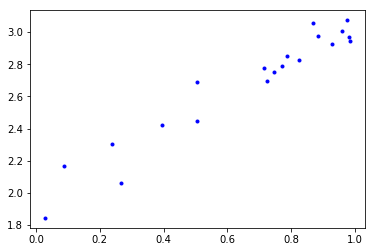

In [49]:
# Create data from a noise contaminated linear model

def MakeNoisyData(m, b, n=20):
    x = tf.random.uniform(shape=(n,))
    noise = tf.random.normal(shape=(len(x),), stddev=0.1)
    y = m * x + b + noise
    return x, y

m=1
b=2
x_train, y_train = MakeNoisyData(m,b)
plt.plot(x_train, y_train, 'b.')

#### Define a linear regression model

In [50]:
from tensorflow.keras.layers import Layer

In [53]:
# Build a custom layer for the linear regression model
class LinearLayer(Layer):
    def __init__(self):
        super(LinearLayer,self).__init__()
        self.m=self.add_weight(shape=(1,),initializer='random_normal')
        self.b=self.add_weight(shape=(1,),initializer='zeros')
        
    def call(self,inputs):
        return self.m*inputs+self.b

linear_regression=LinearLayer()
print(linear_regression(x_train))
print()
print(linear_regression.weights)

tf.Tensor(
[0.03133849 0.03525284 0.02880232 0.02846309 0.00946849 0.03884461
 0.03066305 0.02011103 0.02011726 0.03689848 0.03902383 0.03815815
 0.03459287 0.01059877 0.00117222 0.03282144 0.01576653 0.02971289
 0.03916461 0.0035168 ], shape=(20,), dtype=float32)

[<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.03978279], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


#### Define the loss function

In [54]:
# Define the mean squared error loss function

def SquaredError(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true)) 

starting_loss = SquaredError(linear_regression(x_train), y_train)
print("Starting loss", starting_loss.numpy())

Starting loss 7.154012


#### Train and plot the model

In [56]:
# Implement a gradient descent training loop for the linear regression model

#gardiente desendente hecho a mano
learning_rate=0.05
steps=25

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions=linear_regression(x_train)
        #nota como no hacemos operaciones si no pasamos funcion y no definimos el watch
        loss=SquaredError(predictions,y_train)
    gradients=tape.gradient(loss,linear_regression.trainable_variables)
    
    linear_regression.m.assign_sub(learning_rate*gradients[0])
    linear_regression.b.assign_sub(learning_rate*gradients[1])
    
    print("Paso %d, Loss %f" % (i,loss.numpy()))

Paso 0, Loss 7.154012
Paso 1, Loss 5.216798
Paso 2, Loss 3.804993
Paso 3, Loss 2.776094
Paso 4, Loss 2.026247
Paso 5, Loss 1.479766
Paso 6, Loss 1.081494
Paso 7, Loss 0.791232
Paso 8, Loss 0.579685
Paso 9, Loss 0.425505
Paso 10, Loss 0.313131
Paso 11, Loss 0.231226
Paso 12, Loss 0.171525
Paso 13, Loss 0.128006
Paso 14, Loss 0.096280
Paso 15, Loss 0.073149
Paso 16, Loss 0.056282
Paso 17, Loss 0.043980
Paso 18, Loss 0.035005
Paso 19, Loss 0.028454
Paso 20, Loss 0.023671
Paso 21, Loss 0.020176
Paso 22, Loss 0.017619
Paso 23, Loss 0.015747
Paso 24, Loss 0.014374


m:1,  trained m:[1.256899]
b:2,  trained b:[1.7933115]


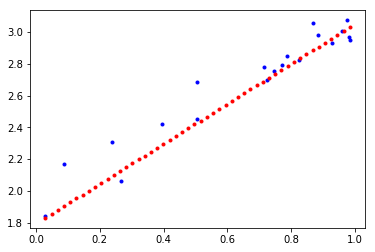

In [57]:
# Plot the learned regression model

print("m:{},  trained m:{}".format(m,linear_regression.m.numpy()))
print("b:{},  trained b:{}".format(b,linear_regression.b.numpy()))

plt.plot(x_train, y_train, 'b.')

x_linear_regression=np.linspace(min(x_train), max(x_train),50)
plt.plot(x_linear_regression, linear_regression.m*x_linear_regression+linear_regression.b, 'r.')

***
<a id="coding_tutorial_4"></a>
## Custom training loops

Ya tenemos todos los elementos para poder genrar nuestros propios ciclos de entrenamiento, manejando paso por paso.

In [ ]:
#ya hemos visto como hacer nuestro algoritmo de optimizacion paso por paso
#tambien podemos usar una instancia de un objeto de funcion de perdida
# y una instancia de optimizador al que le pasamos nuestros gradientes para no programar nostros mismos
#el algoritmo de optimizacion por ejemplo

#importamos tensorflow
import tensorflow as tf
#importsamos la funcion de perdida que ocuparemos
from tensorflow.keras.losses import MeanSquaredError
#importamos el algoritmo de optimizacion que usaremos
from tensorflow.keras.optimizer import SDG

#instanciando un modelo 
my_model=MyModel()

#instanciamos nuestra perdida y el algoritmo
loss=MeanSquaredError()
optimizer=SDG(learning_rate=0.05,momentum=0.9)

#derivamos funcion de perdida usando GradientTape
with GradientTape() as tape:
    #aplicamos perdida a la prediccion del modelo y lo esperado
    current_loss=loss(my_model(inputs),outputs)
    #calculamos los gradientes respecto a cda variable entrenada y los guardamos en una lista
    grads=tape.gradient(current_loss,my_model.trainable_variables)
    
#aplicamos el optimizador a los gradientes calculados con ayuda del metodo .apply_gradients
#eso actualizara automaticamente los parametros de acuerdo al optimizador 
optimizer.apply_gradients(zip(grads,my_model.trainable_variables))

In [ ]:
#podemos aplicar tambien el procedimiento por lotes
# supongamos que training_dataset es un objeto dataset que regresa lotes de inputs y outputs así

#importamos tensorflow
import tensorflow as tf
#importsamos la funcion de perdida que ocuparemos
from tensorflow.keras.losses import MeanSquaredError
#importamos el algoritmo de optimizacion que usaremos
from tensorflow.keras.optimizer import SDG

#instanciando un modelo 
my_model=MyModel()

#instanciamos nuestra perdida y el algoritmo
loss=MeanSquaredError()
optimizer=SDG(learning_rate=0.05,momentum=0.9)

#note que esto es una sola epoca de entrenamiento
#suponemos que suponemos que training_dataset es finito se recorre una vez y se acaba con la ejecucion

#aqui guardaremos las perdidas del lote
batch_losses=[]

#recorremos el lote
for inputs,outputs in training_dataset:
    
    #derivamos funcion de perdida usando GradientTape
    with GradientTape() as tape:
        #aplicamos perdida a la prediccion del modelo y lo esperado
        current_loss=loss(my_model(inputs),outputs)
        #calculamos los gradientes respecto a cda variable entrenada y los guardamos en una lista
        grads=tape.gradient(current_loss,my_model.trainable_variables)
    
    #guardamos la perdida por batch
    batch_losses.append(current_loss)
    #aplicamos el optimizador a los gradientes calculados con ayuda del metodo .apply_gradients
    #eso actualizara automaticamente los parametros de acuerdo al optimizador 
    optimizer.apply_gradients(zip(grads,my_model.trainable_variables))
    
    
#para hacer el proceo anterior por epoca basta meterlo en un ciclo de epocas

#aqui guardaremos tambien la perdida de cada epoca
epoch_losses=[]
for epoch in range(num_epochs):
    #aqui guardaremos las perdidas del lote
    batch_losses=[]

    #recorremos el lote
    for inputs,outputs in training_dataset:

        #derivamos funcion de perdida usando GradientTape
        with GradientTape() as tape:
            #aplicamos perdida a la prediccion del modelo y lo esperado
            current_loss=loss(my_model(inputs),outputs)
            #calculamos los gradientes respecto a cda variable entrenada y los guardamos en una lista
            grads=tape.gradient(current_loss,my_model.trainable_variables)

        #guardamos la perdida por batch
        batch_losses.append(current_loss)
        #aplicamos el optimizador a los gradientes calculados con ayuda del metodo .apply_gradients
        #eso actualizara automaticamente los parametros de acuerdo al optimizador 
        optimizer.apply_gradients(zip(grads,my_model.trainable_variables))
    
    #guardamos por cada epoca la media de las perdidas de los lotes
    epoch_losses.append(np.mean(batch_losses))

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import time

#### Build the model

In [59]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Softmax

In [67]:
# Define the custom layers and model
class MyLayer(Layer):
         
    def __init__(self,units):
        super(MyLayer,self).__init__()
        self.units=units
    #aqui separamos el build del init
    def build(self,input_shape):
        self.w=self.add_weight(shape=(input_shape[-1],self.units),initializer='random_normal',name='kernel') #inicializa pesos   
        self.b=self.add_weight(shape=(self.units,),initializer='zeros',name='bias') #inicializa sesgos
    
    def call(self,inputs):
        return tf.matmul(inputs,self.w)+self.b

class MyDropout(Layer):

    def __init__(self, rate):
        super(MyDropout, self).__init__()
        self.rate = rate
        
    def call(self, inputs):
        # Define forward pass for dropout layer
        return tf.nn.dropout(inputs,rate=self.rate)
    
class MyModel(Model):

    def __init__(self, units_1, units_2, units_3):
        super(MyModel, self).__init__()
        # Define layers
        self.layer1=MyLayer(units_1)
        self.dropout1=MyDropout(0.5)
        self.layer2=MyLayer(units_2)
        self.dropout2=MyDropout(0.5)
        self.layer3=MyLayer(units_3)
        self.softmax=Softmax()
    def call(self, inputs):
        # Define forward pass
        x=self.layer1(inputs)
        x=tf.nn.relu(x)
        x=self.dropout1(x)
        x=self.layer2(x)
        x=tf.nn.relu(x)
        x=self.dropout2(x)
        x=self.layer3(x)
        return self.softmax(x)    

In [68]:
#instanciate the model object
model=MyModel(64,64,64)
print(model(tf.ones((1,10000))))
model.summary()

tf.Tensor(
[[0.00910492 0.01305458 0.02417463 0.00952883 0.01373023 0.0145389
  0.01506997 0.01002813 0.0136742  0.01921157 0.0192055  0.02141683
  0.01661855 0.010644   0.01567224 0.00970886 0.00484321 0.01452804
  0.03031491 0.00679364 0.00895576 0.01273956 0.01165674 0.00666535
  0.02038888 0.00980087 0.02776306 0.00392505 0.00779932 0.04076068
  0.00775666 0.02060031 0.01959355 0.00970403 0.03932459 0.00674915
  0.01185679 0.01237496 0.01008896 0.01033838 0.0100258  0.03127175
  0.01975719 0.020266   0.00611509 0.01311046 0.01773734 0.00826315
  0.0123423  0.0165279  0.01596126 0.00593764 0.03398729 0.01364162
  0.01197923 0.0202081  0.01037764 0.03080892 0.01225139 0.02955383
  0.01738879 0.01678987 0.013521   0.02147209]], shape=(1, 64), dtype=float32)
Model: "my_model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_layer_24 (MyLayer)        multiple                  640064    
_____________

#### Load the reuters dataset and define the class_names 

In [89]:
# Load the dataset

from tensorflow.keras.datasets import reuters

#contiene ejemplos de textos que pertenecen a topicos
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

class_names = ['cocoa','grain','veg-oil','earn','acq','wheat','copper','housing','money-supply',
   'coffee','sugar','trade','reserves','ship','cotton','carcass','crude','nat-gas',
   'cpi','money-fx','interest','gnp','meal-feed','alum','oilseed','gold','tin',
   'strategic-metal','livestock','retail','ipi','iron-steel','rubber','heat','jobs',
   'lei','bop','zinc','orange','pet-chem','dlr','gas','silver','wpi','hog','lead']

In [90]:
# Print the class of the first sample

print("Label: {}".format(class_names[train_labels[0]]))

Label: earn


#### Get the dataset word index

In [91]:
# Load the Reuters word index

word_to_index = reuters.get_word_index()

invert_word_index = dict([(value, key) for (key, value) in word_to_index.items()])
text_news = ' '.join([invert_word_index.get(i - 3, '?') for i in train_data[0]])

In [92]:
# Print the first data example sentence
print(text_news)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


#### Preprocess the data

In [93]:
# Define a function that encodes the data into a 'bag of words' representation

def bag_of_words(text_samples, elements=10000):
    output = np.zeros((len(text_samples), elements))
    for i, word in enumerate(text_samples):
        output[i, word] = 1.
    return output

x_train = bag_of_words(train_data)
x_test = bag_of_words(test_data)

print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)

Shape of x_train: (8982, 10000)
Shape of x_test: (2246, 10000)


#### Define the loss function and optimizer



In [94]:
# Define the categorical cross entropy loss and Adam optimizer

loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

def loss(model, x, y, wd):
    kernel_variables = []
    for l in model.layers:
        for w in l.weights:
            if 'kernel' in w.name:
                kernel_variables.append(w)
    wd_penalty = wd * tf.reduce_sum([tf.reduce_sum(tf.square(k)) for k in kernel_variables])
    y_ = model(x)
    return loss_object(y_true=y, y_pred=y_) + wd_penalty

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

#### Train the model

In [75]:
# Define a function to compute the forward and backward pass

def grad(model, inputs, targets, wd):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets, wd)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [81]:
# Implement the training loop

from tensorflow.keras.utils import to_categorical

start_time = time.time()
#Formamos objeto data set
train_dataset=tf.data.Dataset.from_tensor_slices((x_train,train_labels))
#Formamos lotes
train_dataset=train_dataset.batch(32)

#datos para graficar
train_loss_results=[]
train_accuracy_results=[]

weight_decay=0.005
num_epochs=10

for epoch in range(num_epochs):
    epoch_loss_avg=tf.keras.metrics.Mean()
    epoch_accuracy=tf.keras.metrics.CategoricalAccuracy()
    
    #ciclo de entrenamiento
    for x,y in train_dataset:
        loss_value,grads=grad(model,x,y,weight_decay)
        optimizer.apply_gradients(zip(grads,model.trainable_variables))
        
        #calulando perdida actual
        epoch_loss_avg(loss_value)
        #comparando etiqueta predicha con la actual
        epoch_accuracy(to_categorical(y),model(x))
    
    #final de epoca
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())
    
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))
    
print("Duration :{:.3f}".format(time.time() - start_time))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 000: Loss: 3.397, Accuracy: 48.820%
Epoch 001: Loss: 1.958, Accuracy: 61.178%
Epoch 002: Loss: 1.877, Accuracy: 64.919%
Epoch 003: Loss: 1.825, Accuracy: 66.956%
Epoch 004: Loss: 1.799, Accuracy: 68.481%
Epoch 005: Loss: 1.776, Accuracy: 69.717%
Epoch 006: Loss: 1.755, Accuracy: 69.595%
Epoch 007: Loss: 1.736, Accuracy: 69.639%
Epoch 008: Loss: 1.732, Accuracy: 70.107%
Epoch 009: Loss: 1.719, Accuracy: 70.953%
Duration :270.353


#### Evaluate the model

In [82]:
# Create a Dataset object for the test set

test_dataset = tf.data.Dataset.from_tensor_slices((x_test, test_labels))
test_dataset = test_dataset.batch(32)

In [83]:
# Collect average loss and accuracy

epoch_loss_avg = tf.keras.metrics.Mean()
epoch_accuracy = tf.keras.metrics.CategoricalAccuracy()

In [84]:
# Loop over the test set and print scores

from tensorflow.keras.utils import to_categorical

for x, y in test_dataset:
    # Optimize the model
    loss_value = loss(model, x, y, weight_decay)    
    # Compute current loss
    epoch_loss_avg(loss_value)  
    # Compare predicted label to actual label
    epoch_accuracy(to_categorical(y), model(x))

print("Test loss: {:.3f}".format(epoch_loss_avg.result().numpy()))
print("Test accuracy: {:.3%}".format(epoch_accuracy.result().numpy()))

Test loss: 1.835
Test accuracy: 67.453%


#### Plot the learning curves

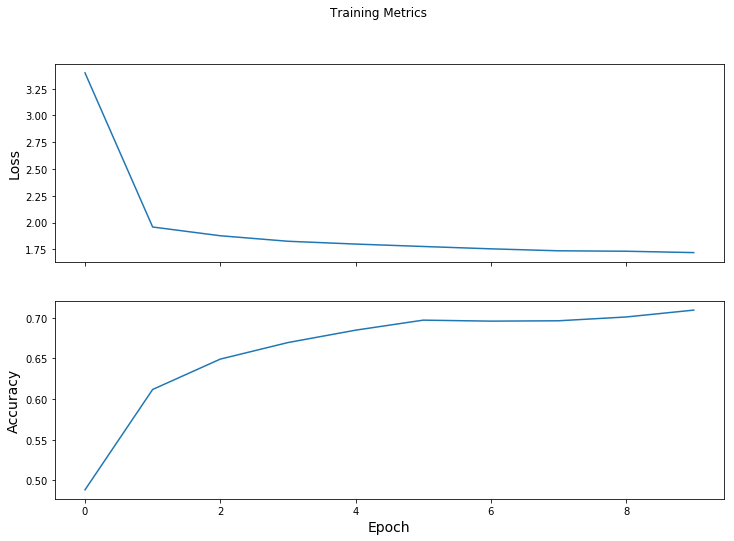

In [85]:
# Plot the training loss and accuracy

fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

#### Predict from the model

In [86]:
# Get the model prediction for an example input

predicted_label = np.argmax(model(x_train[np.newaxis,0]),axis=1)[0]
print("Prediction: {}".format(class_names[predicted_label]))
print("     Label: {}".format(class_names[train_labels[0]]))

Prediction: earn
     Label: earn


***
<a id="coding_tutorial_5"></a>
## tf.function decorator

Tensorflow tiene dos formas de calcular las cosas usando graficas y mediante codigo que ejecuta en tiempo de ejecucion (eager) que es la que se hace por default, los graficos no reducen calculos hacen un mapeo mediante graficas de ellos, hacer codigos para las graficas es complejo pero tensorflow tiene una forma de indicar que partes de codigo se interpretan como graficas y tensorflow en automatico contruye la grafica por detras esto es util pues este metodo hace que los calculos sean mucho mas rápidos.

In [ ]:
#esto es una funcion comun y corriente que se ejecuta al momento eager
def f (x):
    #procesa x
    return x

#si yo decoro mi funcion con @tf.function la funcion se ve igual y se ejecuta igual pero por detras tensorflow
#construye la grafica de calculos que se usa para procesar x
#cada que mandes a llamar esta funcion se ejecutara como grafica
@tf.function
def f (x):
    #procesa x
    return x

#si ejecutas muestra la grafica que tensorflow genera por detras puedes ver como el codigo es mas complejo
print(tf.autograph.to_code(f))

In [87]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import reuters
import numpy as np
import matplotlib.pyplot as plt
import time

#### Build the model

In [88]:
# Initialize a new model
#usamos el modelo que definimos en la seccion anterior
model=MyModel(64,64,46)

#### Redefine the grad function using the @tf.function decorator

In [95]:
# Use the @tf.function decorator

#la misma funcion que hace rato ahora la interpretamos generando su grafica automatica detras de escena
@tf.function
def grad(model, inputs, targets, wd):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets, wd)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

#### Train the model

In [96]:
# Re-run the training loop
#pongamos el mismo ciclo de entrenamiento que codificamos anteriormente no hay qu modificarle nada 
#veamos como simplemente agregando el decorador como mejora el desempeño

from tensorflow.keras.utils import to_categorical

start_time = time.time()
#Formamos objeto data set
train_dataset=tf.data.Dataset.from_tensor_slices((x_train,train_labels))
#Formamos lotes
train_dataset=train_dataset.batch(32)

#datos para graficar
train_loss_results=[]
train_accuracy_results=[]

weight_decay=0.005
num_epochs=10

for epoch in range(num_epochs):
    epoch_loss_avg=tf.keras.metrics.Mean()
    epoch_accuracy=tf.keras.metrics.CategoricalAccuracy()
    
    #ciclo de entrenamiento
    for x,y in train_dataset:
        loss_value,grads=grad(model,x,y,weight_decay)
        optimizer.apply_gradients(zip(grads,model.trainable_variables))
        
        #calulando perdida actual
        epoch_loss_avg(loss_value)
        #comparando etiqueta predicha con la actual
        epoch_accuracy(to_categorical(y),model(x))
    
    #final de epoca
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())
    
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))
    
print("Duration :{:.3f}".format(time.time() - start_time))

#anteriormente duro 270.353 la ejecucion
#con el decorador solo tarda 222.034


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 000: Loss: 3.293, Accuracy: 48.720%
Epoch 001: Loss: 1.913, Accuracy: 59.797%
Epoch 002: Loss: 1.828, Accuracy: 65.153%
Epoch 003: Loss: 1.779, Accuracy: 67.502%
Epoch 004: Loss: 1.762, Accuracy: 68.504%
Epoch 005: Loss: 1.748, Accuracy: 69.205%
Epoch 006: Loss: 1.732, Accuracy: 69.383%
Epoch 007: Loss: 1.722, Accuracy: 70.085%
Epoch 008: Loss: 1.711, Accuracy: 70.396%
Epoch 009: Loss: 1.695, Accuracy: 70.730%
Duration :222.034


#### Print the autograph code

In [97]:
# Use tf.autograph.to_code to see the generated code
#veamos la grafica de la funcion que se auto genero
print(tf.autograph.to_code(grad.python_function))

def tf__grad(model, inputs, targets, wd):
  do_return = False
  retval_ = ag__.UndefinedReturnValue()
  with ag__.FunctionScope('grad', 'grad_scope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as grad_scope:
    with tf.GradientTape() as tape:
      loss_value = ag__.converted_call(loss, grad_scope.callopts, (model, inputs, targets, wd), None, grad_scope)
    do_return = True
    retval_ = grad_scope.mark_return_value((loss_value, ag__.converted_call(tape.gradient, grad_scope.callopts, (loss_value, model.trainable_variables), None, grad_scope)))
  do_return,
  return ag__.retval(retval_)

